<a href="https://colab.research.google.com/github/LilChucky/clustering-project-on-fashion-mnist-dataset/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#libraries
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
from matplotlib import pyplot as plt

In [ ]:
#define a performance evaluation function
from sklearn import metrics
def performance_score(input_values, cluster_indexes):
    try:
        silh_score = metrics.silhouette_score(input_values, cluster_indexes)
        print(' .. Silhouette Coefficient score is {:.2f}'.format(silh_score))
        #print( ' ... -1: incorrect, 0: overlapping, +1: highly dense clusts.')
    except:
        print(' .. Warning: could not calculate Silhouette Coefficient score.')
        silh_score = -999

    try:
        ch_score =\
         metrics.calinski_harabasz_score(input_values, cluster_indexes)
        print(' .. Calinski-Harabasz Index score is {:.2f}'.format(ch_score))
        #print(' ... Higher the value better the clusters.')
    except:
        print(' .. Warning: could not calculate Calinski-Harabasz Index score.')
        ch_score = -999

    try:
        db_score = metrics.davies_bouldin_score(input_values, cluster_indexes)
        print(' .. Davies-Bouldin Index score is {:.2f}'.format(db_score))
        #print(' ... 0: Lowest possible value, good partitioning.')
    except:
        print(' .. Warning: could not calculate Davies-Bouldin Index score.')
        db_score = -999

    try:
        hg_score = metrics.homogeneity_score(input_values, cluster_indexes)
        print(' .. Homogeneity score is {:.2f}'.format(hg_score))
    except:
        print(' .. Warning: could not calculate Homogeneity Index score.')
        hg_score = -999

    return silh_score, ch_score, db_score, hg_score


In [ ]:
# 1,2
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
# 2
x_train, x_validate, y_train, y_validate =\
 train_test_split(x_train, y_train, test_size=0.1, random_state=1)

In [ ]:
num_row = 6
num_col = 6

# get a segment of the dataset
num = num_row*num_col
images = x_train[:num]
labels = y_train[:num]

In [ ]:
#Next let's plot the first 36 of these to recall exactly what we're looking at:
def plot_digits(data):
    fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
    for i in range(num_row*num_col):
        ax = axes[i//num_col, i%num_col]
        ax.imshow(images[i], cmap='gray')
        ax.set_title('Label: {}'.format(labels[i]))



In [ ]:
# 3
from sklearn.decomposition import PCA
pca = PCA(0.85, whiten=True)
#remember: PCA takes as input a 2d matrix: n paradigms x m features
pca_created_data = pca.fit_transform(
          x_train.reshape(x_train.shape[0], (x_train.shape[1]*x_train.shape[2]))
                        )
pca_created_data.shape

(54000, 43)

In [ ]:
inversed_pca_data = pca.inverse_transform(pca_created_data)

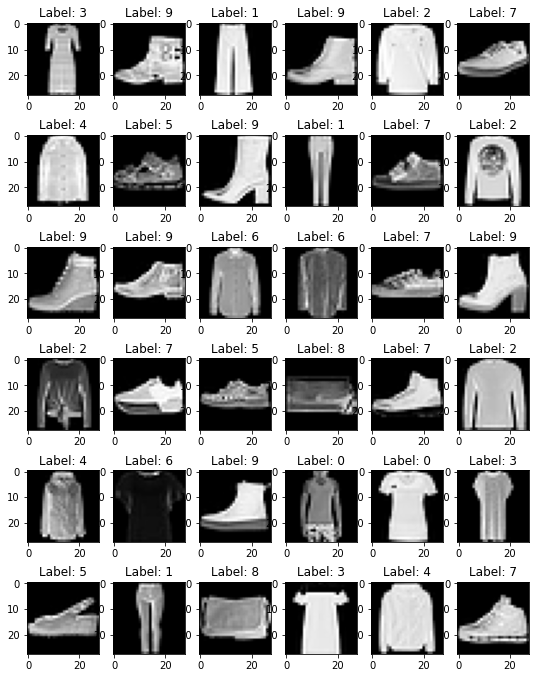

In [ ]:
plot_digits(inversed_pca_data.reshape(inversed_pca_data.shape[0],\
                                      x_train.shape[1],
                                      x_train.shape[2]))

In [ ]:
# 4
pca_projected_data_validation_set = pca.transform(
    x_validate.reshape(x_validate.shape[0], (x_validate.shape[1]*x_validate.shape[2]))
)


In [ ]:
inversed_pca_data_validation_set = pca.inverse_transform(pca_projected_data_validation_set)

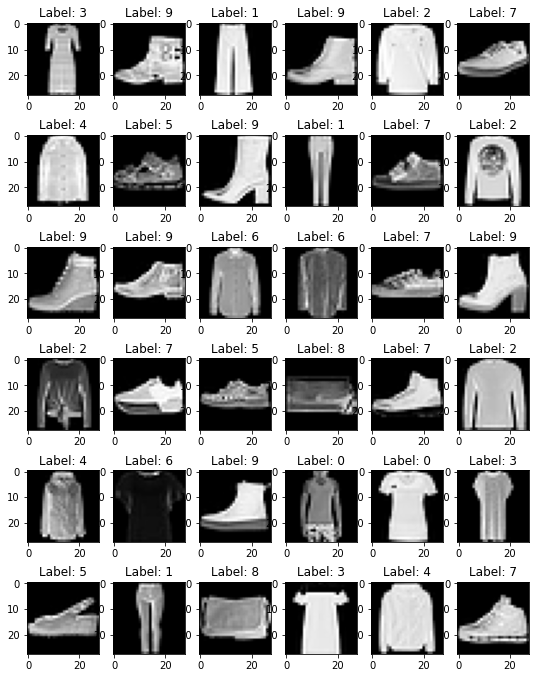

In [ ]:
plot_digits(inversed_pca_data_validation_set.reshape(inversed_pca_data_validation_set.shape[0],\
                                      x_validate.shape[1],
                                      x_validate.shape[2]))

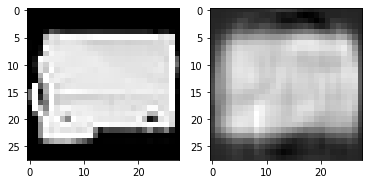

In [ ]:
# 5
sample = 3
image = x_validate[sample]
inversed_image = inversed_pca_data_validation_set.reshape(inversed_pca_data_validation_set.shape[0],\
                                     x_validate.shape[1], x_validate.shape[2])
val_labels = y_validate


fig, axarr = plt.subplots(ncols= 2)
# axarr[0].title(y_validate[sample])
axarr[0].imshow(image, cmap= 'gray',)
# axarr[1].title(y_validate[sample])
axarr[1].imshow(inversed_image[sample], cmap= 'gray')


In [ ]:
print('test set data projected sucessfully.')
print(pca_projected_data_validation_set.shape)

test set data projected sucessfully.
(6000, 43)


In [ ]:
# 6
pca_projected_data_test_set = pca.transform(
    x_test.reshape(x_test.shape[0], (x_test.shape[1]*x_test.shape[2])))

inversed_pca_data_test_set = pca.inverse_transform(pca_projected_data_test_set)

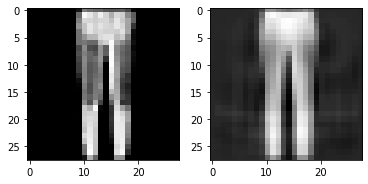

In [ ]:
# 6(plot)
sample = 3
image_test = x_test[sample]
inversed_image_test = inversed_pca_data_test_set.reshape(inversed_pca_data_test_set.shape[0],\
                                     x_test.shape[1], x_test.shape[2])
test_labels = y_test


fig, axarr = plt.subplots(ncols= 2)
# axarr[0].title(tes_labels[sample])
axarr[0].imshow(image_test, cmap= 'gray',)
# axarr[1].title(test_labels[sample])
axarr[1].imshow(inversed_image_test[sample], cmap= 'gray')

In [ ]:
# 7a
from sklearn import cluster
# for numOfClust in range (3,12):
#   print('Currently testing', str(numOfClust),\
#         'number of clusters')
#   mbkm = cluster.MiniBatchKMeans(n_clusters = numOfClust)
#   mbkm.fit(x_test.reshape(x_test.shape[0], (x_test.shape[1]*x_test.shape[2]) ))
#   clusterLabels = mbkm.labels_
#   # silh_score = metrics.silhouette_score(y_validate.reshape(-1, 1), clusterLabels)
#   silh_score, ch_score, db_score = \
#   performance_score( y_test.reshape(-1, 1), clusterLabels)

In [ ]:
mbkm = cluster.MiniBatchKMeans(n_clusters = 3)
mbkm.fit(x_test.reshape(x_test.shape[0], (x_test.shape[1]*x_test.shape[2]) ))
clusterLabels = mbkm.labels_

In [ ]:
agglCl = cluster.AgglomerativeClustering()
clustering = agglCl.fit(x_test.reshape(x_test.shape[0], (x_test.shape[1]*x_test.shape[2]) ))
agglClusterLabels = clustering.labels_

In [ ]:
kmeans1 = cluster.KMeans (init = "k-means++", n_clusters=3, n_init=35)
kmeans1.fit(x_test.reshape(x_test.shape[0], (x_test.shape[1]*x_test.shape[2]) ))
kmcLabels = kmeans1.labels_

In [ ]:
# # 7b
# for numOfClust in range (3,12):
#   print('Currently testing', str(numOfClust), 'number of clusters')
#   mbkm_pca = cluster.MiniBatchKMeans(n_clusters = numOfClust)
#   mbkm_pca.fit(pca_projected_data_test_set)
#   clusterLabels = mbkm_pca.labels_
#   # silh_score = metrics.silhouette_score(y_validate.reshape(-1, 1), clusterLabels)
#   silh_score, ch_score, db_score = performance_score( y_test.reshape(-1, 1), clusterLabels)

In [ ]:
mbkm_pca = cluster.MiniBatchKMeans(n_clusters = 3)
mbkm_pca.fit(pca_projected_data_test_set)
pca_clusterLabels = mbkm_pca.labels_

In [ ]:
agglCl_pca = cluster.AgglomerativeClustering()
nextclustering = agglCl_pca.fit(pca_projected_data_test_set)
pcaagglClusterLabels = nextclustering.labels_

In [ ]:
kmeans1_pca = cluster.KMeans (init = "k-means++", n_clusters=3, n_init=35)
kmeans1_pca.fit(pca_projected_data_test_set)
kmc_pca_Labels = kmeans1_pca.labels_

In [ ]:
# 8 No PCA
print('KMeans scores')
kmeans_nopca_test_silh_score, kmeans_nopca_test_ch_score, kmeans_nopca_test_db_score, kmeans_nopca_test_hg_score = \
  performance_score( y_test.reshape(-1, 1), kmcLabels)
print('Agglomerative scores')
aggl_nopca_test_silh_score, aggl_nopca_test_ch_score, aggl_nopca_test_db_score, aggl_nopca_test_hg_score = \
  performance_score( y_test.reshape(-1, 1), agglClusterLabels)
print('MiniBatchKMeans scores')
mbkm_nopca_test_silh_score, mbkm_nopca_test_ch_score, mbkm_nopca_test_db_score, mbkm_nopca_test_hg_score = \
  performance_score( y_test.reshape(-1, 1), clusterLabels)

KMeans scores
 .. Silhouette Coefficient score is 0.11
 .. Calinski-Harabasz Index score is 3110.08
 .. Davies-Bouldin Index score is 2.00
 .. Warning: could not calculate Homogeneity Index score.
Agglomerative scores
 .. Silhouette Coefficient score is 0.28
 .. Calinski-Harabasz Index score is 4552.63
 .. Davies-Bouldin Index score is 1.18
 .. Warning: could not calculate Homogeneity Index score.
MiniBatchKMeans scores
 .. Silhouette Coefficient score is 0.11
 .. Calinski-Harabasz Index score is 3030.57
 .. Davies-Bouldin Index score is 2.20
 .. Warning: could not calculate Homogeneity Index score.


In [ ]:
# 8 PCA
print('KMeans scores PCA')
kmeans_test_silh_score, kmeans_test_ch_score, kmeans_test_db_score, kmeans_test_hg_score = \
  performance_score( y_test.reshape(-1, 1), kmc_pca_Labels)
print('Agglomerative scores PCA')
aggl_test_silh_score, aggl_test_ch_score, aggl_test_db_score, aggl_test_hg_score = \
  performance_score( y_test.reshape(-1, 1), pcaagglClusterLabels)
print('MiniBatchKMeans scores PCA')
mbkm_test_silh_score, mbkm_test_ch_score, mbkm_test_db_score, mbkm_test_hg_score = \
  performance_score( y_test.reshape(-1, 1), pca_clusterLabels)


KMeans scores PCA
 .. Silhouette Coefficient score is -0.00
 .. Calinski-Harabasz Index score is 3138.43
 .. Davies-Bouldin Index score is 0.95
 .. Warning: could not calculate Homogeneity Index score.
Agglomerative scores PCA
 .. Silhouette Coefficient score is 0.17
 .. Calinski-Harabasz Index score is 1787.56
 .. Davies-Bouldin Index score is 0.64
 .. Warning: could not calculate Homogeneity Index score.
MiniBatchKMeans scores PCA
 .. Silhouette Coefficient score is -0.04
 .. Calinski-Harabasz Index score is 795.12
 .. Davies-Bouldin Index score is 3.28
 .. Warning: could not calculate Homogeneity Index score.


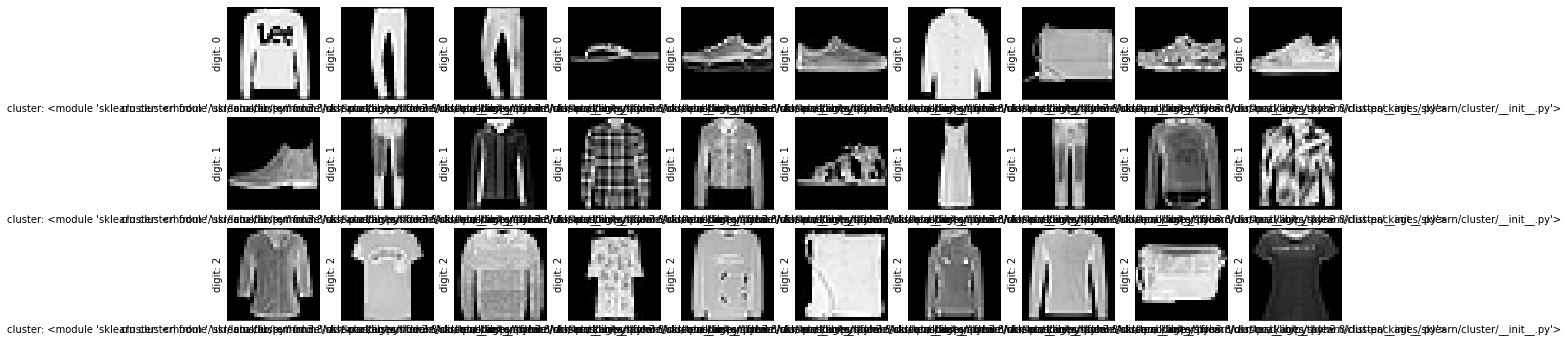

In [ ]:
# 9
fig = plt.figure(figsize=(20,20))
for clusterIdx in range(3):
    for c, val in enumerate(x_test[pca_clusterLabels == clusterIdx][0:10]):
        fig.add_subplot(10, 10, 10*clusterIdx+c+1)
        plt.imshow(val.reshape((28,28)))
        plt.gray()
        plt.xticks([])
        plt.yticks([])
        plt.xlabel('cluster: '+str(cluster))
        plt.ylabel('digit: '+str(clusterIdx))

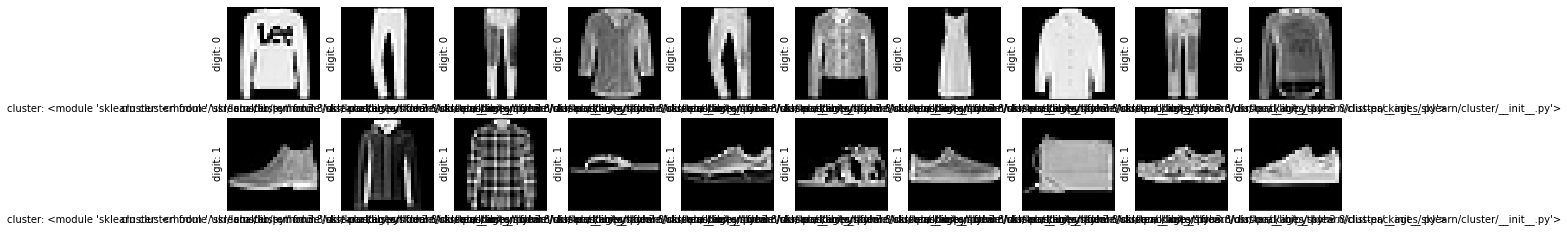

In [ ]:
fig = plt.figure(figsize=(20,20))
for clusterIdx in range(2):
    for c, val in enumerate(x_test[agglClusterLabels == clusterIdx][0:10]):
        fig.add_subplot(10, 10, 10*clusterIdx+c+1)
        plt.imshow(val.reshape((28,28)))
        plt.gray()
        plt.xticks([])
        plt.yticks([])
        plt.xlabel('cluster: '+str(cluster))
        plt.ylabel('digit: '+str(clusterIdx))

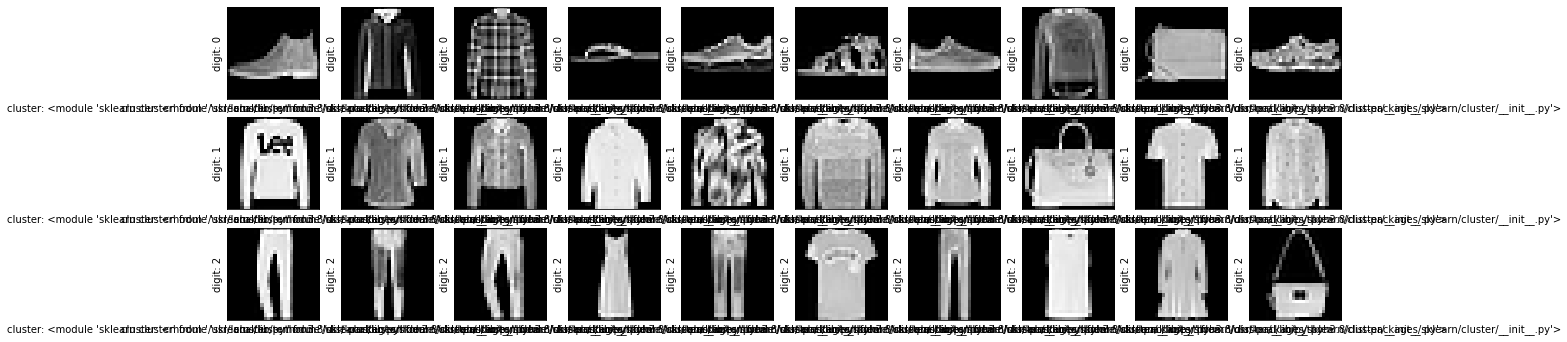

In [ ]:
fig = plt.figure(figsize=(20,20))
for clusterIdx in range(3):
    for c, val in enumerate(x_test[kmcLabels == clusterIdx][0:10]):
        fig.add_subplot(10, 10, 10*clusterIdx+c+1)
        plt.imshow(val.reshape((28,28)))
        plt.gray()
        plt.xticks([])
        plt.yticks([])
        plt.xlabel('cluster: '+str(cluster))
        plt.ylabel('digit: '+str(clusterIdx))

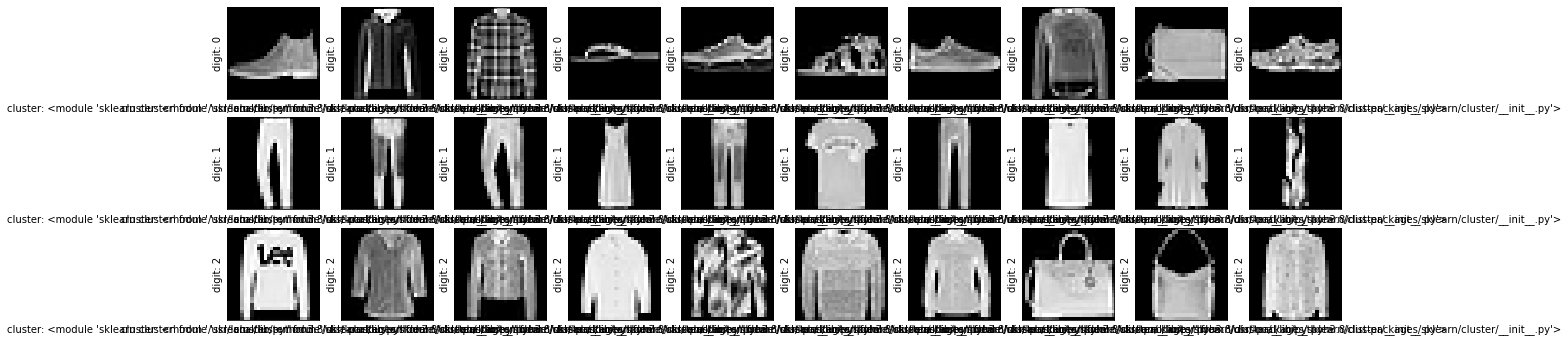

In [ ]:
#performance scores & visualizations
fig = plt.figure(figsize=(20,20))
for clusterIdx in range(3):
    for c, val in enumerate(x_test[clusterLabels == clusterIdx][0:10]):
        fig.add_subplot(10, 10, 10*clusterIdx+c+1)
        plt.imshow(val.reshape((28,28)))
        plt.gray()
        plt.xticks([])
        plt.yticks([])
        plt.xlabel('cluster: '+str(cluster))
        plt.ylabel('digit: '+str(clusterIdx))

In [ ]:
import pandas as pd

In [ ]:
scorenm = ["Silhouette Coefficient","Calinski-Harabasz Index","Davies-Bouldin Index","Homogeneity"]

mbkmscs = [mbkm_nopca_test_silh_score, mbkm_nopca_test_ch_score, mbkm_nopca_test_db_score, kmeans_nopca_test_hg_score]
agglscs = [aggl_nopca_test_silh_score, aggl_nopca_test_ch_score, aggl_nopca_test_db_score, aggl_nopca_test_hg_score]
kmsscs = [kmeans_nopca_test_silh_score, kmeans_nopca_test_ch_score, kmeans_nopca_test_db_score,mbkm_nopca_test_hg_score]

mbkmpcascs = [mbkm_test_silh_score, mbkm_test_ch_score, mbkm_test_db_score, kmeans_test_hg_score]
agglpcascs = [aggl_test_silh_score, aggl_test_ch_score, aggl_test_db_score, aggl_test_hg_score]
kmspcascs = [kmeans_test_silh_score, kmeans_test_ch_score, kmeans_test_db_score, mbkm_test_hg_score]

dict = {'Score':scorenm, "MiniBatchKMeans":mbkmscs,\
        "MiniBatchKMeans PCA":mbkmpcascs,"Agglomerative":agglscs,\
        "Agglomerative PCA":agglpcascs,"KMeans":kmsscs,"KMeans PCA":kmspcascs}

dfNew = pd.DataFrame(dict)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/drive/My Drive/ClusteringResults.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  dfNew.to_csv(f, index = False)